In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,412.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,828.0,0.0,0.0,1.0,0.0,17.0
2,2.0,1.0,354.0,1205.0,1.0,0.0,0.0,0.0,80.0
3,64.0,1.0,301.0,471.0,1.0,0.0,0.0,0.0,115.0
4,136.0,1.0,337.0,468.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...
7665,36.0,2.0,116.0,464.0,1.0,0.0,0.0,0.0,30.0
7666,43.0,1.0,344.0,464.0,0.0,0.0,1.0,0.0,50.0
7667,58.0,2.0,94.0,408.0,0.0,0.0,1.0,0.0,75.0
7668,67.0,1.0,331.0,425.0,1.0,0.0,0.0,0.0,60.0


In [21]:
df.corr()

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
number_of_reviews,1.000000,-0.007382,0.142246,-0.433202,0.002756,0.018684,-0.006723,-0.000932,0.048492
calculated_host_listings_count,-0.007382,1.000000,0.171054,-0.101889,-0.020436,0.010314,0.021767,-0.013467,0.121820
availability_365,0.142246,0.171054,1.000000,-0.259133,0.012557,0.003953,-0.013617,0.000026,0.141251
datetime_diff,-0.433202,-0.101889,-0.259133,1.000000,0.022695,-0.003953,-0.021871,-0.001036,-0.107297
room_type=0,0.002756,-0.020436,0.012557,0.022695,1.000000,-0.135705,-0.945946,-0.151772,-0.018313
room_type=1,0.018684,0.010314,0.003953,-0.003953,-0.135705,1.000000,-0.081834,-0.013130,-0.003576
room_type=2,-0.006723,0.021767,-0.013617,-0.021871,-0.945946,-0.081834,1.000000,-0.091523,0.021651
room_type=3,-0.000932,-0.013467,0.000026,-0.001036,-0.151772,-0.013130,-0.091523,1.000000,-0.009211
price,0.048492,0.121820,0.141251,-0.107297,-0.018313,-0.003576,0.021651,-0.009211,1.000000


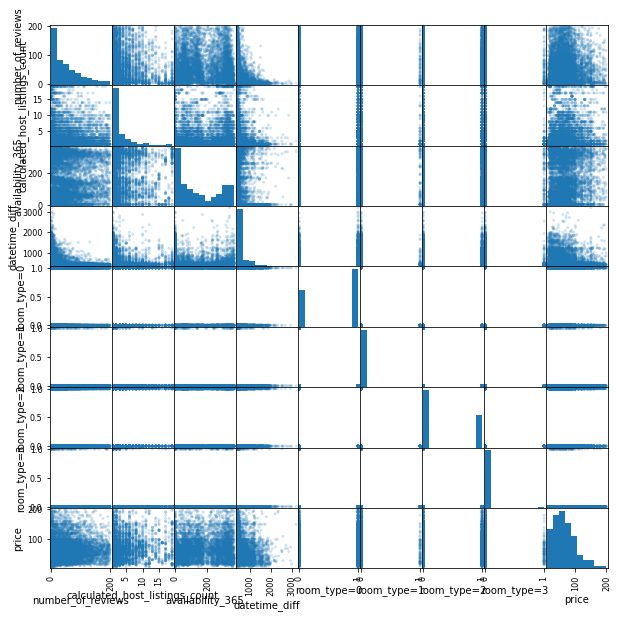

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

In [23]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 2:3], y_train)

In [25]:
sr.coef_, sr.intercept_

(array([0.03946864]), 60.14114052169218)

In [26]:
y_pred = sr.predict(X_test[:, 2:3])

In [27]:
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:, 0:1], y_test)

(0.018581446271937807, 0.004692517819584352)

In [28]:
sr.score(X_train[:, 2:3], y_train), sr.score(X_test[:, 0:1], y_test)

(0.018581446271937807, 0.004692517819584352)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 2:3])), mean_squared_error(y_test, y_pred)

(1343.8046278181725, 1281.855335012044)

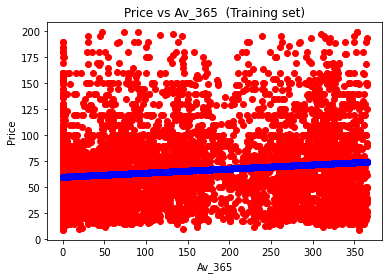

In [30]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sr.predict(X_train[:, 2:3]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

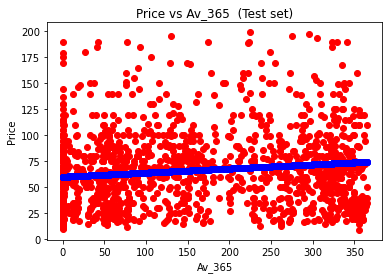

In [31]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sr.predict(X_test[:, 2:3]), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

In [33]:
mr.coef_, mr.intercept_

(array([-0.00621646,  0.89023704,  0.03039957, -0.00794671, -0.49922953,
         2.01501124,  1.8166618 , -3.33244351]),
 63.27981378810932)

In [34]:
y_pred = mr.predict(X_test)

In [35]:
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.03270608148708076, 0.03961862607275801)

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(1324.4645102951733, 1261.4552951846401)

In [37]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues

array([5.58732373e-183, 5.45924758e-001, 1.37270005e-012, 1.66875871e-015,
       1.39841102e-006, 6.58077627e-021, 4.33937455e-005, 8.15742639e-027,
       3.07217639e-003])

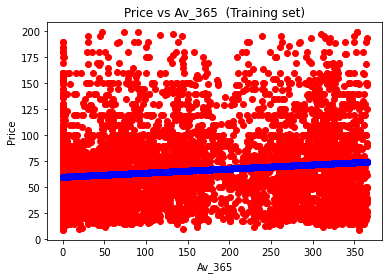

In [38]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], sr.predict(X_train[:, 2:3]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

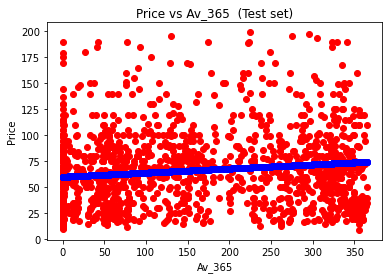

In [39]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], sr.predict(X_test[:, 2:3]), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [40]:
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [41]:
X_Modeled

array([[ 49.,   1., 119., 401.,   1.],
       [ 99.,   1.,  27., 409.,   1.],
       [ 15.,   6.,  68., 403.,   1.],
       ...,
       [ 40.,   1., 169., 489.,   1.],
       [176.,   2.,  31., 421.,   1.],
       [146.,   1., 260., 407.,   1.]])

In [42]:
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, 0:4], y_train)

In [43]:
omr.coef_, omr.intercept_

(array([-0.00625571,  0.89702853,  0.03019964, -0.00804262]),
 63.66207958007479)

In [44]:
y_pred = omr.predict(X_test[:, 0:4])

In [45]:
omr.score(X_train[:, 0:4], y_train), omr.score(X_test[:, 0:4], y_test)

(0.031645951905443725, 0.04314198401041025)

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, omr.predict(X_train[:, 0:4])), mean_squared_error(y_test, y_pred)

(1325.9160897792572, 1256.827385223093)

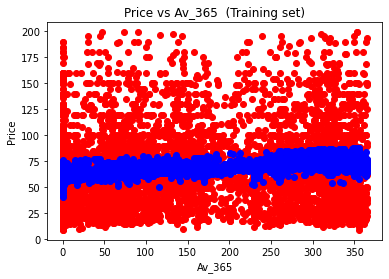

In [47]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], omr.predict(X_train[:, 0:4]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

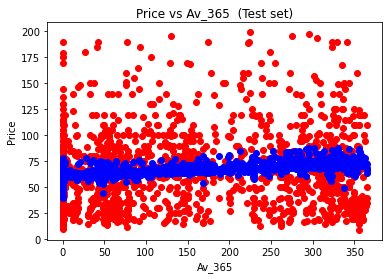

In [48]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], mr.predict(X_test), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [50]:
pr.coef_, pr.intercept_

(array([ 0.18665879, -0.000443  ]), 55.44977196192967)

In [51]:
y_pred = pr.predict(X_test_p[:,1:])

In [52]:
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.03613183251288443, 0.06160814745415666)

In [53]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(1319.7738102215499, 1232.5721879751468)

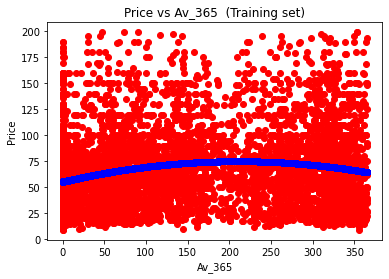

In [54]:
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('Price vs Av_365  (Training set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()

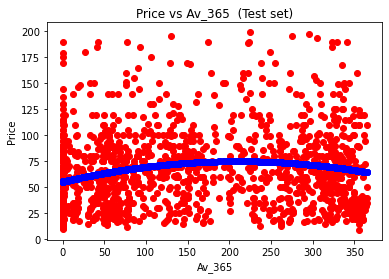

In [55]:
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('Price vs Av_365  (Test set)')
plt.xlabel('Av_365')
plt.ylabel('Price')
plt.show()